# The task is the prediction of the results of the midterms: MTTotalScore (numbers) and MTSucceed( 0 and 1). This done by scikit-learn and working on  Naive Bayesian Network model class (BernoulliNB).

# There are 2 cases of target of the model: 
# 1. MTSucceed .
# 2. MTTotalScore .


### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import datetime

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

### Reading the Dataset and after discovring, there is a dates and time format so we have to deal with.


In [2]:
# Reading the Dataset and after discovring, there is a dates and time format so we have to deal with.
dataset = pd.read_csv('AIML2019_OnlyTotals_en.csv', parse_dates=True, decimal=',') # parse_dates

# extend the width of pd to get more clear 
num_columns = len(dataset.columns)
pd.set_option("display.max_columns", num_columns)

pd.set_option("display.max_rows", 538)

pd.set_option("display.width", 2000)


# try to show information
dataset.head(10)

,InValidationSet,idStudent,Gender,YearOfBirth,LocationOfBirth,CourseRetake,Specialization,kviz1.1,kviz2.1,kviz2.2,kviz1.2,kviz3.1,kviz3.2,kviz4.1,kviz4.2,kviz4.3,kviz5.1,kviz5.2,kviz6.1,kviz6.2,kviz8.1,kviz8.2,kviz8.3,kviz8.4,kviz8.5,kviz9.1,kviz9.2,kviz10.1,kviz10.2,Kviz10.3,kviz10.4,kviz10.5,kviz10.6,kviz10.7,kviz11.1,kviz11.2,kviz11.3,kviz12.1,kviz12.2,kviz12.3,kviz12.4,kviz12.5,kviz13.1,Kviz13.2,kviz16.1,kviz16.2,kviz16.3,kviz17.1,kviz17.2,kviz17.3,kviz17.4,kviz17.5,kviz17.6,kviz17.7,kviz17.8,kviz18.1,kviz19.1,kviz20.1,kviz20.2,HW1Submission,HW1DateOfFirstSubmission,HW1DateOfLastSubmission,HW1Score,HW1ScoreVariance,HW1DaysBeforeDeadlineOfLastSubmission,HW1DaysBeforeDeadlineOfFirstSubmission,HW1MeanOfDaysBeforeDeadlineOfSubmissions,HW1VarianceOfDaysBeforeDeadlineOfSubmissions,HW2Submission,HW2DateOfFirstSubmission,HW2DateOfLastSubmission,HW2Score,HW2ScoreVariance,HW2DaysBeforeDeadlineOfLastSubmission,HW2DaysBeforeDeadlineOfFirstSubmission,HW2MeanOfDaysBeforeDeadlineOfSubmissions,HW2VarianceOfDaysBeforeDeadlineOfSubmissions,HW3Submission,HW3DateOfFirstSubmission,HW3DateOfLastSubmission,HW3Score,HW3ScoreVariance,HW3DaysBeforeDeadlineOfLastSubmission,HW3DaysBeforeDeadlineOfFirstSubmission,HW3MeanOfDaysBeforeDeadlineOfSubmissions,HW3VarianceOfDaysBeforeDeadlineOfSubmissions,MTTotalScore,MTSucceed
0,0,5B0569,1,1996,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,54.0,18-10-21 23:14,18-10-25 18:24,8.0,2.8951,3.0,7.0,5.6296,1.0417,22.0,18-11-03 21:41,18-11-22 02:31,12.0,2.4996,3.0,22.0,7.5,7.8726,42.0,18-12-08 02:55,18-12-10 20:39,7.0,4.9128,0.0,2.0,0.1429,0.5151,28,1.0
1,1,F465A4,1,1998,0,0,0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,3.0,18-10-20 19:51,18-10-21 01:30,12.0,5.6569,7.0,8.0,7.6667,0.4714,14.0,18-11-11 13:04,18-11-11 15:35,12.0,4.5294,14.0,14.0,14,0,11.0,18-12-09 18:40,18-12-10 00:10,9.0,5.4682,0.0,1.0,0.8182,0.3857,41,1.0
2,1,79403A,0,1992,1,0,0,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,18-10-22 12:17,18-10-22 12:17,12.0,0,6.0,6.0,6,0,10.0,18-11-17 16:28,18-11-19 14:38,9.0,4.7843,6.0,8.0,6.6,0.6633,1.0,18-12-10 20:11,18-12-10 20:11,0.0,0,0.0,0.0,0,0,15.5,0.0
3,0,562B7A,1,1997,1,0,0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.5,0.0
4,0,DB5D99,1,1998,1,0,0,NaN,0.0,0.0,NaN,0.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,18-10-11 22:41,18-10-13 20:19,12.0,5.6569,15.0,17.0,16.3333,0.9428,20.0,18-11-18 16:13,18-11-21 17:56,9.0,4.6355,4.0,7.0,5.6,1.3565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.5,0.0
5,0,CE47E8,1,1997,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,18-10-17 22:49,18-10-22 21:33,9.0,3.9357,6.0,11.0,8.75,2.246,93.0,18-11-12 01:11,18-11-13 01:39,8.0,3.9365,12.0,13.0,12.7312,0.4433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,1.0
6,0,95390F,0,1998,1,0,0,NaN,0.0,1.0,0.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### There are non-namric values and NaN values (missing values) which we have to deal with, so we have to collect infomation about the dataset

In [3]:
# shape
print(dataset.shape)

(538, 88)


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

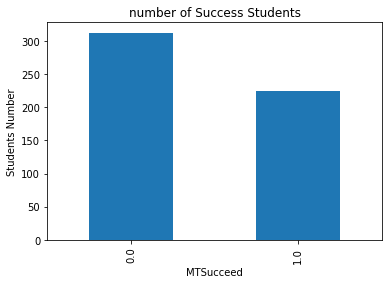

In [4]:
dataset['MTSucceed'].value_counts().plot(kind='bar')
plt.title('number of Success Students')
plt.xlabel('MTSucceed')
plt.ylabel('Students Number')
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

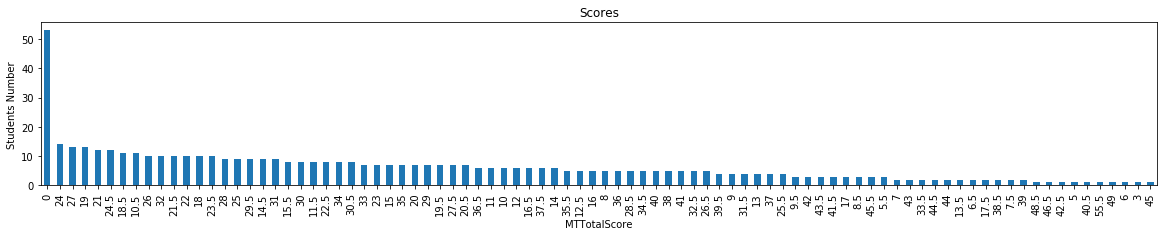

In [5]:
plt.rcParams["figure.figsize"] = (20,3)
dataset['MTTotalScore'].value_counts().plot(kind='bar')
plt.title('Scores')
plt.xlabel('MTTotalScore')
plt.ylabel('Students Number')
sns.despine

### The dataset contains 538 rows (Samples) and 88 columns (features) including the targets. Let's see the types of data in the dataset

In [6]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 88 columns):
InValidationSet                                 538 non-null int64
idStudent                                       538 non-null object
Gender                                          538 non-null int64
YearOfBirth                                     538 non-null int64
LocationOfBirth                                 538 non-null int64
CourseRetake                                    538 non-null int64
Specialization                                  538 non-null int64
kviz1.1                                         74 non-null float64
kviz2.1                                         235 non-null float64
kviz2.2                                         233 non-null float64
kviz1.2                                         286 non-null float64
kviz3.1                                         122 non-null float64
kviz3.2                                         127 non-null float64
kviz4.1     

### dtypes: float64(75), int64(6), object(7), we have to deal with object datatype(it expected to be dates with times), in order to processing we have to convert datatype of them to float or int

### Now, we will know about the missing values in data set

In [7]:
#show the persentage of the missing values in every columns or features

print(dataset.isnull().mean() * 100)

InValidationSet                                  0.000000
idStudent                                        0.000000
Gender                                           0.000000
YearOfBirth                                      0.000000
LocationOfBirth                                  0.000000
CourseRetake                                     0.000000
Specialization                                   0.000000
kviz1.1                                         86.245353
kviz2.1                                         56.319703
kviz2.2                                         56.691450
kviz1.2                                         46.840149
kviz3.1                                         77.323420
kviz3.2                                         76.394052
kviz4.1                                         61.710037
kviz4.2                                         65.613383
kviz4.3                                         64.869888
kviz5.1                                         72.676580
kviz5.2       

In [8]:
#kviz20.1                                        97.026022
#kviz20.2                                        95.910781
#MTTotalScore                                     0.185874
#MTSucceed                                        0.185874


### The quizs 20.1 and 20.2 have more than 95% of missing values, so I will delete them to avoid effect of the proformance of model. # MTSucceed and MTTotalScore will be the targets so I Will delete the rows (samples) don't contain these valuse

In [9]:
dataset= dataset.drop(['kviz20.1','kviz20.2'], axis=1)

# drop rows with data missing for MTSucceed and MTTotalScore
dataset= dataset.dropna(subset=['MTTotalScore','MTSucceed'],how='any')

###Try to improve the accuracy of the model by delete the Mean and Variance Columns from the dataset

### As mentioned by prof. peter : "InValidationSet: 0 denotes a train-test sample , 1 a validation sample." we have to investigate and get information about them

In [10]:
# class distribution
print(dataset.groupby('InValidationSet').size())  

InValidationSet
0    437
1    100
dtype: int64


#### we have 437 samples as training test set and 100 as validation set, so firstly, we will split the data to sets (training_test and validation) then we will split training_test  by ""set to get the data ready for the model

In [11]:

train_test  = dataset.loc[dataset['InValidationSet']  == 0] # sorting values by InValidationSet to get train_test set
validation = dataset.loc[dataset['InValidationSet'] > 0 ] # sorting values by InValidationSet to get validation set

print('train_test shape is ' , train_test.shape)
print('validation shape is ' , validation.shape)

train_test shape is  (437, 86)
validation shape is  (100, 86)


### There is an important step to avoid this error : ValueError: Cannot use mean strategy with non-numeric data. which is cased by 'idStudent' ValueError: could not convert string to float: '5B0569' . idStudent feature will not effect on values of tragets but we need it for printing the ids of students of validation set, so I will delete the column but I will keep it for printing. 




In [12]:
validationidstudent= validation['idStudent']

train_test= train_test.drop(['idStudent'], axis=1)
validation= validation.drop(['idStudent'], axis=1)



### in order to solve error : ValueError: could not convert string to float: '18-10-21 23:14' , we have to convert dates to date frame then float

In [13]:
#Convert dates to date frame
train_test['HW1DateOfFirstSubmission'] = pd.to_datetime(train_test.HW1DateOfFirstSubmission)
train_test['HW1DateOfLastSubmission'] = pd.to_datetime(train_test.HW1DateOfLastSubmission)
train_test['HW2DateOfFirstSubmission'] = pd.to_datetime(train_test.HW2DateOfFirstSubmission)
train_test['HW2DateOfLastSubmission'] = pd.to_datetime(train_test.HW2DateOfLastSubmission)
train_test['HW3DateOfFirstSubmission'] = pd.to_datetime(train_test.HW3DateOfFirstSubmission)
train_test['HW3DateOfLastSubmission'] = pd.to_datetime(train_test.HW3DateOfLastSubmission)

train_test['HW1DateOfFirstSubmission'] = train_test['HW1DateOfFirstSubmission'].values.astype('float')
train_test['HW1DateOfLastSubmission'] = train_test['HW1DateOfLastSubmission'].values.astype('float')
train_test['HW2DateOfFirstSubmission'] = train_test['HW2DateOfFirstSubmission'].values.astype('float')
train_test['HW2DateOfLastSubmission'] = train_test['HW2DateOfLastSubmission'].values.astype('float')
train_test['HW3DateOfFirstSubmission'] = train_test['HW3DateOfFirstSubmission'].values.astype('float')
train_test['HW3DateOfLastSubmission'] = train_test['HW3DateOfLastSubmission'].values.astype('float')

#Convert  date frame to float
validation['HW1DateOfFirstSubmission'] = pd.to_datetime(validation.HW1DateOfFirstSubmission)
validation['HW1DateOfLastSubmission'] = pd.to_datetime(validation.HW1DateOfLastSubmission)
validation['HW2DateOfFirstSubmission'] = pd.to_datetime(validation.HW2DateOfFirstSubmission)
validation['HW2DateOfLastSubmission'] = pd.to_datetime(validation.HW2DateOfLastSubmission)
validation['HW3DateOfFirstSubmission'] = pd.to_datetime(validation.HW3DateOfFirstSubmission)
validation['HW3DateOfLastSubmission'] = pd.to_datetime(validation.HW3DateOfLastSubmission)

validation['HW1DateOfFirstSubmission'] = validation['HW1DateOfFirstSubmission'].values.astype('float')
validation['HW1DateOfLastSubmission'] = validation['HW1DateOfLastSubmission'].values.astype('float')
validation['HW2DateOfFirstSubmission'] = validation['HW2DateOfFirstSubmission'].values.astype('float')
validation['HW2DateOfLastSubmission'] = validation['HW2DateOfLastSubmission'].values.astype('float')
validation['HW3DateOfFirstSubmission'] = validation['HW3DateOfFirstSubmission'].values.astype('float')
validation['HW3DateOfLastSubmission'] = validation['HW3DateOfLastSubmission'].values.astype('float')

### training_test and validation for 2 cases

In [14]:

X_train_test_MTSucceed = train_test.iloc[:, :-1].values # get train_test values without MTSucceed
X_train_test_MTTotalScore = train_test.loc[:, train_test.columns != 'MTTotalScore'].values # get train_test values without MTTotalScore

print(' X train_test values' )                   
print('X_train_test_MTSucceed shape is ' , X_train_test_MTSucceed.shape)
print('X_train_test_MTTotalScore shape is ' , X_train_test_MTSucceed.shape)
print('================================================================' )

Y_train_test_MTSucceed = train_test['MTSucceed'].values
Y_train_test_MTTotalScore  = train_test['MTTotalScore'].values
print(' Y train_test values' )  
print('Y_train_test_MTSucceed shape is ' , Y_train_test_MTSucceed.shape)
print('Y_train_test_MTTotalScore shape is ' , Y_train_test_MTTotalScore.shape)

print('================================================================' )
#print(X_train_test_MTTotalScore)


 X train_test values
X_train_test_MTSucceed shape is  (437, 84)
X_train_test_MTTotalScore shape is  (437, 84)
 Y train_test values
Y_train_test_MTSucceed shape is  (437,)
Y_train_test_MTTotalScore shape is  (437,)


In [15]:
print(' X validation values' ) 

X_validation_MTSucceed = validation.iloc[:, :-1].values # get validation values without MTSucceed
X_validation_MTTotalScore = validation.loc[:, validation.columns != 'MTTotalScore'].values # get validation values without MTTotalScore

                  
print('X_validation_MTSucceed shape is ' , X_validation_MTSucceed.shape)
print('X_validation_MTTotalScore shape is ' , X_validation_MTTotalScore.shape)
print('================================================================' )

print(' Y validation values' )                   

Y_validation_MTSucceed = validation['MTSucceed'].values
Y_validation_MTTotalScore  = validation['MTTotalScore'].values

print('Y_validation_MTSucceed shape is ' , Y_validation_MTSucceed.shape)
print('Y_validation_MTTotalScore shape is ' , Y_validation_MTTotalScore.shape)


 X validation values
X_validation_MTSucceed shape is  (100, 84)
X_validation_MTTotalScore shape is  (100, 84)
 Y validation values
Y_validation_MTSucceed shape is  (100,)
Y_validation_MTTotalScore shape is  (100,)


### in next step, we will need to handle the missing data in our data sets

In [16]:
# Cleaning data


ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='mean')

ImputedX = ImputedModule.fit(X_train_test_MTSucceed)
X_train_test_MTSucceed  = ImputedX.transform(X_train_test_MTSucceed )

ImputedX = ImputedModule.fit(X_train_test_MTTotalScore)
X_train_test_MTTotalScore  = ImputedX.transform(X_train_test_MTTotalScore)


print('======================Cleaning data==========================================' )


ImputedX = ImputedModule.fit(X_validation_MTSucceed )
X_validation_MTSucceed   = ImputedX.transform(X_validation_MTSucceed  )


ImputedX = ImputedModule.fit(X_validation_MTTotalScore  )
X_validation_MTTotalScore    = ImputedX.transform(X_validation_MTTotalScore   )



# after running this, we will get error that :

#ValueError: Cannot use mean strategy with non-numeric data. Received datatype :O.
# ValueError: could not convert string to float: '5B0569'

# ValueError: could not convert string to float: '18-10-21 23:14'

#solution delete idstudent and convert the dates




======================Cleaning data==========================================


### Here we reach to split the traning test set to two groups by function train_test_split

In [17]:
#Splitting data




X_train_MTSucceed, X_test_MTSucceed, Y_train_MTSucceed, Y_test_MTSucceed = train_test_split(X_train_test_MTSucceed, Y_train_test_MTSucceed)
X_train_MTTotalScore, X_test_MTTotalScore, Y_train_MTTotalScore, Y_test_MTTotalScore = train_test_split(X_train_test_MTTotalScore, Y_train_test_MTTotalScore)


#Splitted Data
print('MTSucceed')
print('X_train_MTSucceed shape is ' , X_train_MTSucceed.shape)
print('X_test_MTSucceed  shape is ' , X_test_MTSucceed.shape)
print('Y_train_MTSucceed shape is ' , Y_train_MTSucceed.shape)
print('Y_test_MTSucceed shape is ' , Y_test_MTSucceed.shape)
print('============================================================================')
print('MTTotalScore')
print('X_train_MTTotalScore shape is ' , X_train_MTSucceed.shape)
print('X_test_MTTotalScore  shape is ' , X_test_MTTotalScore.shape)
print('Y_train_MTTotalScore shape is ' , Y_train_MTTotalScore.shape)
print('Y_test_MTTotalScore shape is ' , Y_test_MTTotalScore.shape)



MTSucceed
X_train_MTSucceed shape is  (327, 84)
X_test_MTSucceed  shape is  (110, 84)
Y_train_MTSucceed shape is  (327,)
Y_test_MTSucceed shape is  (110,)
MTTotalScore
X_train_MTTotalScore shape is  (327, 84)
X_test_MTTotalScore  shape is  (110, 84)
Y_train_MTTotalScore shape is  (327,)
Y_test_MTTotalScore shape is  (110,)


### Now, we reach to implement the BernoulliNB model for our 3 cases:

### first case : # 1. MTSucceed only.



In [18]:
print ('BernoulliNBModel for MTSucceed only')

BernoulliNBModel = BernoulliNB(alpha=0.02,fit_prior=True)
#BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True)
BernoulliNBModel.fit(X_train_MTSucceed, Y_train_MTSucceed)

#Calculating Details
print('BernoulliNBModel Train Score is : ' , BernoulliNBModel.score(X_train_MTSucceed, Y_train_MTSucceed))
print('BernoulliNBModel Test Score is : ' , BernoulliNBModel.score(X_test_MTSucceed, Y_test_MTSucceed))

BernoulliNBModel for MTSucceed only
BernoulliNBModel Train Score is :  0.7186544342507645
BernoulliNBModel Test Score is :  0.7090909090909091


In [19]:
print ('MTSucceed only')

MTSucceedpred =BernoulliNBModel.fit(X_train_MTSucceed, Y_train_MTSucceed).predict(X_validation_MTSucceed)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(Y_validation_MTSucceed , MTSucceedpred, normalize = True))

MTSucceed only
Naive-Bayes accuracy :  0.75


### 0.75 ... sounds good

### Second case:  # 2. MTTotalScore only.

In [20]:
print ('BernoulliNBModel for MTTotalScore only')

BernoulliNBModel = BernoulliNB(alpha=1.8,fit_prior=True, binarize=0.0)
#BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True)
BernoulliNBModel.fit(X_train_MTTotalScore, Y_train_MTTotalScore)

#Calculating Details
print('BernoulliNBModel Train Score is : ' , BernoulliNBModel.score(X_train_MTTotalScore, Y_train_MTTotalScore))
print('BernoulliNBModel Test Score is : ' , BernoulliNBModel.score(X_test_MTTotalScore, Y_test_MTTotalScore))

BernoulliNBModel for MTTotalScore only
BernoulliNBModel Train Score is :  0.3730886850152905
BernoulliNBModel Test Score is :  0.06363636363636363


In [21]:
print ('MTSucceed only')

MTTotalScorepred =BernoulliNBModel.fit(X_train_MTTotalScore, Y_train_MTTotalScore).predict(X_validation_MTTotalScore)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(Y_validation_MTTotalScore, MTTotalScorepred, normalize = True))

MTSucceed only
Naive-Bayes accuracy :  0.08


### It's realy bad for MTTotalScore

### Conclusion : BernoulliNB model is so good for binary ouput prediction but so bad to mulit variable prediction

# Saving the data with validaions predictions

In [22]:
validation['MTSucceedpred'] = MTSucceedpred
validation['MTTotalScorepred'] = MTTotalScorepred
validation['idstudent'] = validationidstudent# time to use it



dataset = pd.DataFrame(validation, columns=['idstudent','MTTotalScore','MTTotalScorepred','MTSucceed', 'MTSucceedpred',])
dataset.to_csv("RESULTS_CMGDJZ.csv")

In [23]:
dataset = pd.read_csv('RESULTS_CMGDJZ.csv', parse_dates=True, decimal=',')

dataset.head(101)

,Unnamed: 0,idstudent,MTTotalScore,MTTotalScorepred,MTSucceed,MTSucceedpred
0,1,F465A4,41,29.5,1.0,1.0
1,2,79403A,15.5,24.5,0.0,1.0
2,7,93E4F1,10.5,24,0.0,1.0
3,26,5BC59C,26.5,0,1.0,0.0
4,28,7FF281,18,0,0.0,0.0
5,30,BF3A9E,31,32,1.0,0.0
6,33,3C2567,34,29.5,1.0,1.0
7,43,C2CBA2,30,0,1.0,0.0
8,54,BBF4EA,40,10.5,1.0,0.0
9,63,6E4211,32.5,18,1.0,0.0


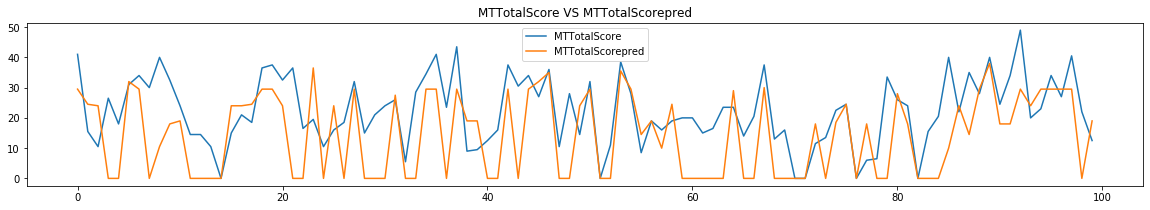

In [24]:
# line 1 points 
#index = dataset.iloc[:,-1].values
#print(index)

xindex = list(range(len(dataset)))

#print(xindex)

MTTotalScore = dataset['MTTotalScore'].values.astype('float')
#print(MTTotalScore)

MTTotalScorepred = dataset['MTTotalScorepred'].values.astype('float')


plt.plot(xindex, MTTotalScore, label = "MTTotalScore") 

plt.plot(xindex, MTTotalScorepred, label = "MTTotalScorepred") 

plt.title('MTTotalScore VS MTTotalScorepred')

plt.legend() 
plt.show() 

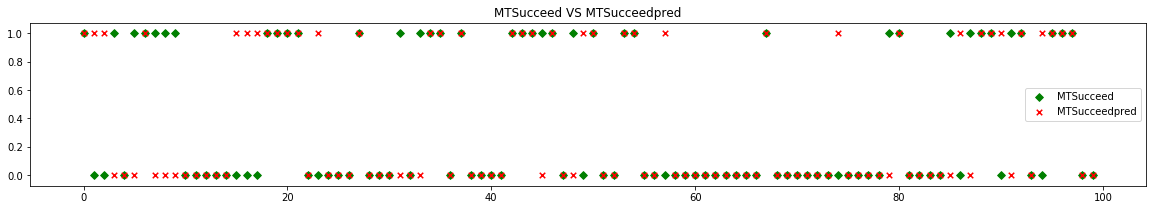

In [33]:
# line 1 points 
xindex = list(range(len(dataset)))

MTSucceed = dataset['MTSucceed'].values.astype('float')



MTSucceedpred = dataset['MTSucceedpred'].values.astype('float')


#plt.plot(index, MTSucceed, label = "MTSucceed") 
plt.scatter(xindex, MTSucceed, label= "MTSucceed", color= "green",  
            marker= "D", s=30)

#plt.plot(index, MTSucceedpred, label = "MTSucceedpred") 


plt.scatter(xindex, MTSucceedpred, label= "MTSucceedpred", color= "red",  
            marker= "x", s=30)
plt.title('MTSucceed VS MTSucceedpred')

plt.legend() 
plt.show() 



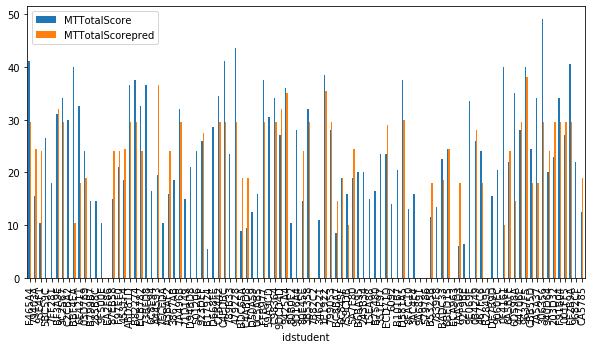

In [26]:
plt.rcParams["figure.figsize"] = (20,3)

#dataset=dataset.astype(float)
dataset['MTTotalScore'] = dataset['MTTotalScore'].values.astype('float')
dataset['MTTotalScorepred'] = dataset['MTTotalScorepred'].values.astype('float')

dataset.plot(x="idstudent", y=["MTTotalScore", "MTTotalScorepred"], kind="bar",figsize=(10, 5))
